# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math


import warnings
warnings.filterwarnings('ignore') 

## 01 - Problem (case study)

- Data Description.

- Goal.

In [2]:
# Data is about a car insurance business
# The goal is to develop a model that inferes accurately the total claimed amounts.

## 02 - Getting Data

Read the .csv file.

In [3]:
df = pd.read_csv('/Users/ignaciolorenzoqueralt/Documents/Ironhack/labs/lab-customer-analysis-final-round/files_for_lab/csv_files/marketing_customer_analysis.csv')

## 03 - Cleaning/Wrangling/EDA

- Change headers names.

In [4]:
def standardize_headers(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
standardize_headers(df)

- Deal with NaN values.

In [5]:
df.isnull().any()
# There are no null values

customer                         False
state                            False
customer_lifetime_value          False
response                         False
coverage                         False
education                        False
effective_to_date                False
employmentstatus                 False
gender                           False
income                           False
location_code                    False
marital_status                   False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
policy_type                      False
policy                           False
renew_offer_type                 False
sales_channel                    False
total_claim_amount               False
vehicle_class                    False
vehicle_size                     False
dtype: bool

- Categorical Features.

In [6]:
cat = df.select_dtypes(include='object')
cat.head(3)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


- Numerical Features.

In [7]:
num = df.select_dtypes(include='number')
num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


Distribution plot before adjusting incomes:


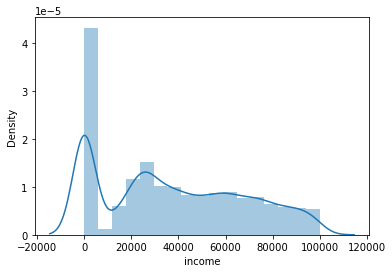

In [8]:
#it makes no sense to have such a large amount of data with an income below 0
print("Distribution plot before adjusting incomes:")
x = df['income']
ax = sns.distplot(x)

Distribution plot before adjusting incomes with mean:


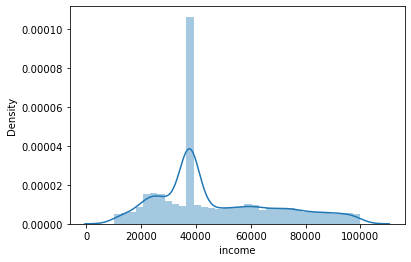

In [9]:
df['income'] = df['income'].replace([0],df['income'].mean())
print("Distribution plot before adjusting incomes with mean:")
x = df['income']
ax = sns.distplot(x)

In [10]:
num = df.select_dtypes(include='number')
num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,47209.837802,21723.702506,10037.000000,34337.000000,37657.380009,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


- Exploration.

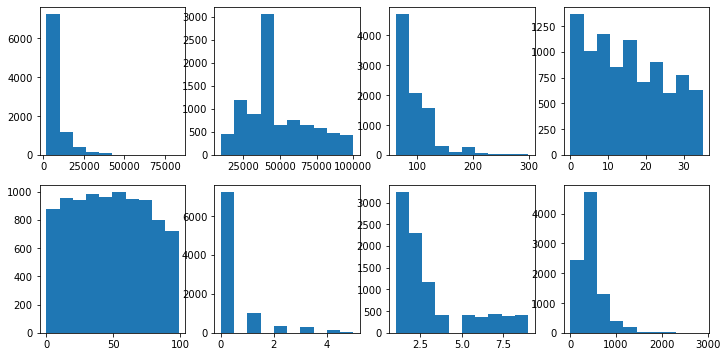

In [11]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs[0, 0].hist(df['customer_lifetime_value'])
axs[0, 1].hist(df['income'])
axs[0, 2].hist(df['monthly_premium_auto'])
axs[0, 3].hist(df['months_since_last_claim'])
axs[1, 0].hist(df['months_since_policy_inception'])
axs[1, 1].hist(df['number_of_open_complaints'])
axs[1, 2].hist(df['number_of_policies'])
axs[1, 3].hist(df['total_claim_amount'])

plt.show()

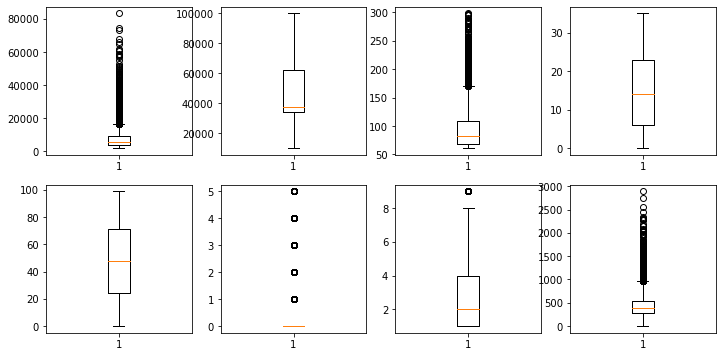

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs[0, 0].boxplot(df['customer_lifetime_value'])
axs[0, 1].boxplot(df['income'])
axs[0, 2].boxplot(df['monthly_premium_auto'])
axs[0, 3].boxplot(df['months_since_last_claim'])
axs[1, 0].boxplot(df['months_since_policy_inception'])
axs[1, 1].boxplot(df['number_of_open_complaints'])
axs[1, 2].boxplot(df['number_of_policies'])
axs[1, 3].boxplot(df['total_claim_amount'])

plt.show()

## 04 - Processing Data

- Dealing with outliers.

In [13]:
num.shape

(9134, 8)

In [14]:
# as we can observe in the boxplots above, the columns with more outliers are: 
    # customer_lifetime_value
    # monthly_premium_auto
    # total_claim_amount
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        iqr = np.percentile(df[column],75) - np.percentile(df[column],25)
        upper_limit = np.percentile(df[column],75) + 1.5*iqr
        lower_limit = np.percentile(df[column],25) - 1.5*iqr
        df = df[(num[column]>lower_limit) & (df[column]<upper_limit)]
    return df
num = remove_outliers (num, in_columns =['customer_lifetime_value','monthly_premium_auto','total_claim_amount'])
num.shape

(7789, 8)

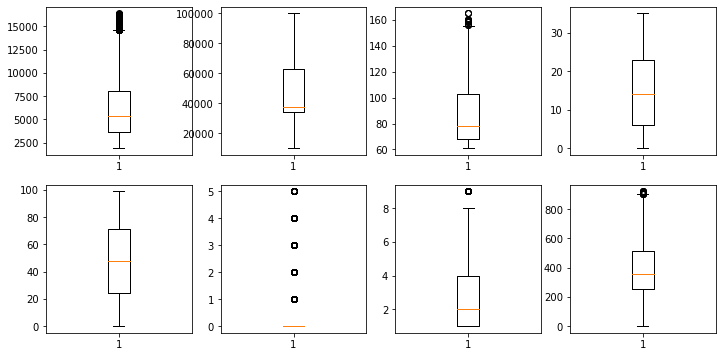

In [15]:
#checking the boxplots again:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs[0, 0].boxplot(num['customer_lifetime_value'])
axs[0, 1].boxplot(num['income'])
axs[0, 2].boxplot(num['monthly_premium_auto'])
axs[0, 3].boxplot(num['months_since_last_claim'])
axs[1, 0].boxplot(num['months_since_policy_inception'])
axs[1, 1].boxplot(num['number_of_open_complaints'])
axs[1, 2].boxplot(num['number_of_policies'])
axs[1, 3].boxplot(num['total_claim_amount'])

plt.show()

In [16]:
df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

- Normalization.

In [17]:
#X-y split
y = df['total_claim_amount']
x = df.drop(['total_claim_amount'], axis=1)

x_num = x.select_dtypes(include = np.number)
x_cat = x.select_dtypes(include = np.object)

In [18]:
# print df.head to have a reference so I can compare normalized vs non normalized
x_num.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274.000000,69,32,5,0,1
1,6979.535903,37657.380009,94,13,42,0,8
2,12887.431650,48767.000000,108,18,38,0,2


In [19]:
x_num.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [20]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

x_num_normalized, _ci = boxcox_transform(x_num)
x_num_normalized.shape

(9134, 7)

In [21]:
"""
transformer = Normalizer().fit(x_num)
x_num_normalized = transformer.transform(x_num)
print(x_num_normalized.shape)
"""

'\ntransformer = Normalizer().fit(x_num)\nx_num_normalized = transformer.transform(x_num)\nprint(x_num_normalized.shape)\n'

- Encoding Categorical Data.

In [22]:
cat_encoded = pd.get_dummies(x_cat, drop_first=True)
cat_encoded

,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


- Splitting into train set and test set.

In [23]:
x_num_normalized.shape, cat_encoded.shape

((9134, 7), (9134, 9234))

In [24]:
x_num_normalized.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [25]:
X = np.concatenate([x_num_normalized, cat_encoded], axis=1)
X

array([[ 2.70383943, 42.11498267,  0.68534739, ...,  1.        ,
         1.        ,  0.        ],
       [ 2.75492635, 38.34627666,  0.6858706 , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.78077243, 40.73536758,  0.68603902, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 2.76206241, 38.34627666,  0.68572538, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.75839723, 33.75131941,  0.68589838, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.70016535, 38.34627666,  0.68556047, ...,  1.        ,
         1.        ,  0.        ]])

## 05 - Modeling

Apply model.

In [26]:
X.shape, y.shape

((9134, 9241), (9134,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
predictions  = model.predict(X_test)
predictions.shape

(2741,)

## 06 - Model Validation

- R2.

In [32]:
r2 = r2_score(y_test, predictions)
print(r2)

0.7092063163010898


- MSE.

In [33]:
mse = mean_squared_error(y_test, predictions)
print(mse)

23592.879262474507


- RMSE.

In [36]:
rmse = math.sqrt(mse)
print(rmse)

153.59973718230935


- MAE.

In [38]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

1.1225618663797898


## 07 - Reporting

Present results.